# Smoothing Images

## Goal
- 다양한 low pass filter를 통해 이미지를 blur한다.
- custom-made filter를 image에 적용한다.(2D convolution)

## 2D Convolution (Image Filtering)

1차원 신호처럼 이미지에도 다양한 low-pass filters(LPF), high-pass filters(HPF)등을 적용할 수 있다. LPF는 노이즈 제거와 이미지의 blurring 등에 도움이 된다. HPF는 이미지의 edge finding에 도움이 된다.

OpenCV는 이미지에 kernel을 적용할 수 있는 `cv2.filter2D()` 함수를 제공한다.

여기서는 이미지에 averaging filter를 적용해본다. 5x5 average filter의 kernel은 다음과 같다.

$$
K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}
$$

아래 예제는 다음과 같은 동작을 수행한다.

kernel 영역(5x5) 아래의 모든 픽셀을 더한 후 평균 낸 값으로 중앙 픽셀 값을 대체하는 과정을 이미지의 모든 픽셀에 대해 수행한다.

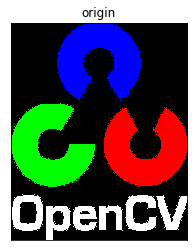

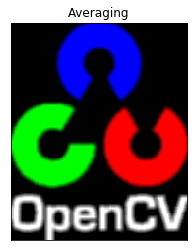

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/opencv-logo-white.png')

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)

plt.imshow(img, cmap='gray'), plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(dst, cmap='gray'), plt.title('Averaging'), plt.xticks([]), plt.yticks([])
plt.show()

## Image Blurring (Image Smoothing)

이미지 blurring은 loss-pass filter kernel을 통해 수행할 수 있으며 노이즈 제거에 유용하다. 사실 이는 이미지의 noise, edge와 같은 high frequency content를 제거하기 때문에 edge에도 약간의 blurring이 적용된다.(edge는 blur하지 않는 blurring 기법이 따로 있음)

OpenCV는 4가지의 blurring 기법을 제공한다.

### 1. Averaging

이미지에 normalized box filter를 적용한다. 이는 kernel 영역 아래의 모든 픽셀을 평균낸 값으로 중간 값을 대체한다. `cv2.blur()` 또는 `cv2.boxFilter()` 함수를 통해 수행할 수 있으며 kernel의 width, height를 전달해 주어야 한다. (kernel에 대해 자세한 내용은 문서를 참고)

3x3 normalized box filter는 다음과 같다.

$$
K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
$$

#### Note
normalized box filter를 사용하고 싶지 않은 경우, `cv2.boxFilter()`에 인자로 `normalize=False`를 전달해서 사용하면 된다.

다음은 5x5 크기의 kernel을 적용하는 예이다.

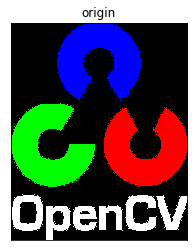

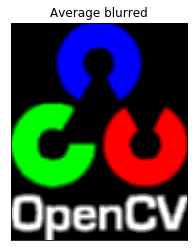

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/opencv-logo-white.png')

blur = cv2.blur(img, (5, 5))

plt.imshow(img, cmap='gray'), plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(blur, cmap='gray'), plt.title('Average blurred'), plt.xticks([]), plt.yticks([])
plt.show()

### 2. Gaussian Blurring

box filter대신, Gaussian kernel을 사용하는 방법이다. `cv2.GaussianBlur()`를 통해 수행할 수 있다. 

함수 사용 시 양수 및 홀수가 되도록 kernel의 width, height를 지정해야 한다. 또한, X, Y 방향의 표준 편차를 각각 sigmaX, sigmaY로 지정해줄 수 있는데, 만약 sigmaX만 지정될 경우, sigmaY는 sigmaX와 같은 값이 된다. 만약 이 두 값(sigmaX, sigmaY)이 0으로 주어질 경우, kernel size로부터 계산된다. 

Gaussian blur는 이미지의 Gaiussian noise 제거에 효과적이다.

`cv2.getGaussianKernel()`을 통해 Gaussian kernel을 직접 만들 수도 있다.

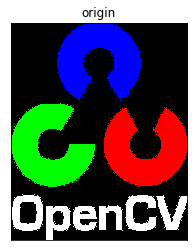

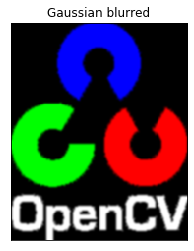

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/opencv-logo-white.png')

blur = cv2.GaussianBlur(img, (5, 5), 0)

plt.imshow(img, cmap='gray'), plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(blur, cmap='gray'), plt.title('Gaussian blurred'), plt.xticks([]), plt.yticks([])
plt.show()

### 3. Median Blurring

`cv2.medianBlur()`는 kernel 영역 아래의 모든 픽셀의 중간 값(median value)으로 중간 값(center element)을 대체한다. 

median blurring은 salt-and-pepper noise에 매우 효과적이다. 앞서 살펴본 다른 filter들은, 새로운 값으로 center element를 대체하지만, median blurring은 이미지에 존재하는 pixel값으로 대체한다는 점이 다르다.

다른 방법들과 마찬가지로 noise 제거에 효과적이며, kernel size는 양수 및 홀수가 되어야 한다.

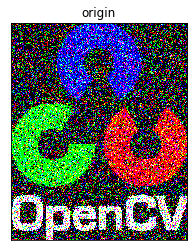

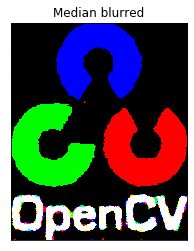

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(img):
    h, w, c = img.shape
    gauss = np.random.normal(0, 1, (h, w, c))
    gauss = gauss.reshape(h, w, c)
    noisy = img + gauss
    return noisy

img = cv2.imread('./images/opencv-logo-white.png')

img = add_gaussian_noise(img)
img = img.astype('uint8')

blur = cv2.medianBlur(img, 5)

plt.imshow(img, cmap='gray'), plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(blur, cmap='gray'), plt.title('Median blurred'), plt.xticks([]), plt.yticks([])
plt.show()

### 4. Bilateral Filtering

`cv2.bilateralFilter()`는 edge의 sharp를 유지하면서 noise를 제거하는데에 효과적이다. 하지만 연산속도가 다른 filter에 비해 느리다.

Gaussian filter는 주변 pixel에서 gaussian weighted average를 찾는다는 것을 앞서 살펴보았다.

Gaussian filter는 주변 pixel을 공간상으로만 바라보며 blurring한다. 따라서 pixel간의 intensity나 pixel이 edge인지를 고려하지 않기 때문에 edge도 같이 bluring하게 된다.

반면, Bilateral filtering는 공간상으로 바라보는 Gaussian filter에 pixel간의 차이 function으로 Gaussian filter를 하나 더 추가한 방식이다.

공간 상의 Gaussian filter는 주변 pixel의 blurring만을 담당하고, pixel간의 차이를 고려하는 Gaussian function은 blurring될 pixel들이 central pixel과 intensity가 유사한지를 고려한다. Edge는 높은 intensity 변화를 가지기 때문에, egde를 보존할 수 있게 된다.

다음은 Bilateral Filtering을 적용한 예이다. (함수의 파라미터에 관한 자세한 설명은 [doc](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed)을 참고)

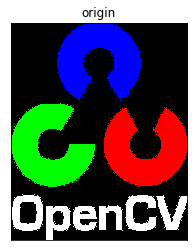

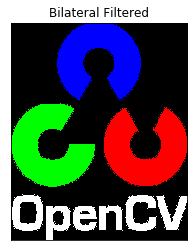

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/opencv-logo-white.png')

blur = cv2.bilateralFilter(img, 9, 75, 75)

plt.imshow(img, cmap='gray'), plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(blur, cmap='gray'), plt.title('Bilateral Filtered'), plt.xticks([]), plt.yticks([])
plt.show()